## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
data=pd.read_csv('loan_approval_data.csv')

In [3]:
data.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


## Checking shape of data

In [4]:
data.shape

(614, 13)

## Printing number of rows and columns

In [5]:
print("Number of Rows: ", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows:  614
Number of Columns: 13


In [6]:
data.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

## Checking info of data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [8]:
data.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.dtypes

loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [10]:
numerical = []
categorical = []

for col in (data.columns):
    if data[col].dtypes == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("Numerical columns = ",numerical)
print("\nCategorical columns = ",categorical)

Numerical columns =  ['dependents', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history']

Categorical columns =  ['loan_id', 'gender', 'married', 'education', 'self_employed', 'property_area', 'loan_status']


## Checking for duplicates

In [11]:
duplicate=data[data.duplicated()]
print("Duplicate records in the dataset are:",duplicate.shape[0])

Duplicate records in the dataset are: 0


## Checking for Missing Values

In [12]:
print(data.isna().sum())

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


### As we can see here, there are too many columns missing with small amount of null values so we use mean amd mode to replace with NaN values.

In [13]:
for col in categorical :
    data[col].fillna(data[col].mode()[0],inplace=True)

In [14]:
data['loanamount']=data['loanamount'].fillna(data['loanamount'].mean())
data['credit_history']=data['credit_history'].fillna(data['credit_history'].mean())
data['dependents']=data['dependents'].fillna(data['dependents'].mean())
data['loan_amount_term']=data['loan_amount_term'].fillna(data['loan_amount_term'].mean())

## Checking for missing values again

In [15]:
print(data.isna().sum())

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


### As we can see that there are no missing values in the data set now.

## Drop unnecessary columns

In [16]:
data.drop(columns=["loan_id"],inplace= True)

## Data Visualization

y    0.687296
n    0.312704
Name: loan_status, dtype: float64


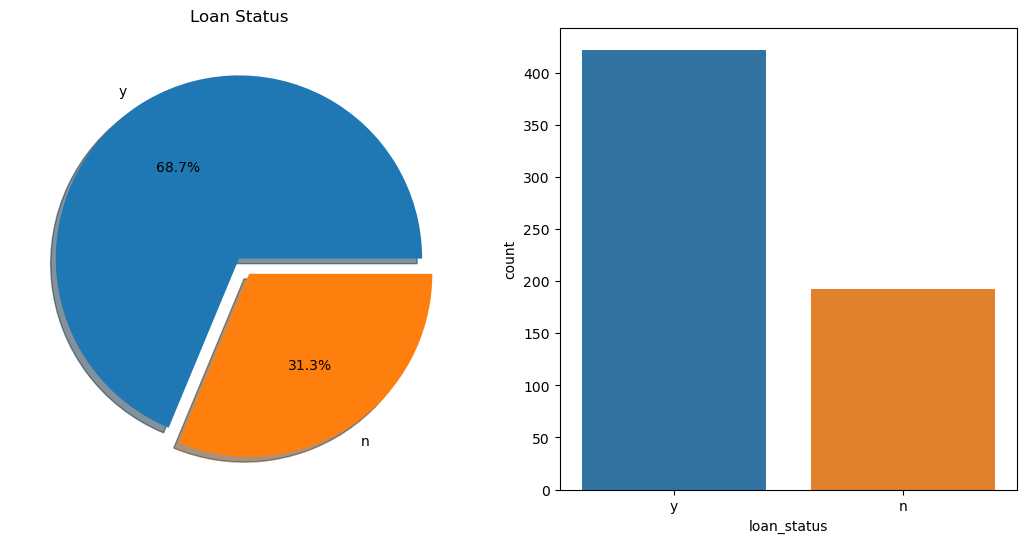

In [17]:
print(data['loan_status'].value_counts(normalize = True))
f,ax=plt.subplots(1,2,figsize=(13,6))
data['loan_status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Loan Status')
ax[0].set_ylabel('')
sns.countplot(x = 'loan_status', data = data)
plt.show()

### 68.7% loans accepted and 31.3% loans rejected

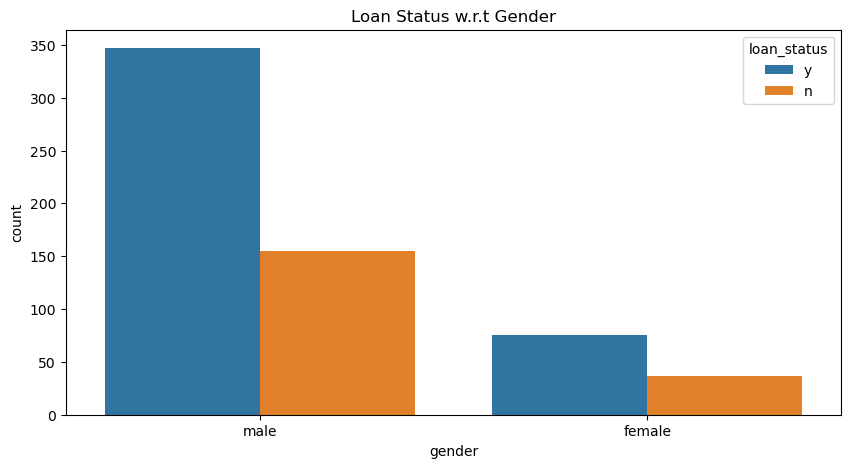

In [18]:
plt.figure(figsize =(10,5))
g = sns.countplot(x = data['gender'], hue = data['loan_status'])
plt.title("Loan Status w.r.t Gender")
plt.show()

### Males got more loan than females

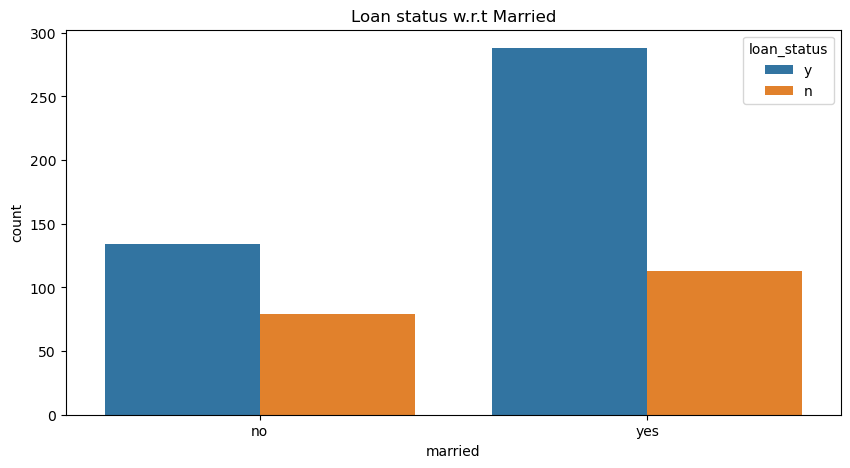

In [19]:
plt.figure(figsize =(10,5))
g = sns.countplot(x = data['married'], hue = data['loan_status'])
plt.title("Loan status w.r.t Married")
plt.show()

### Married persons got more loans than unmarried persons

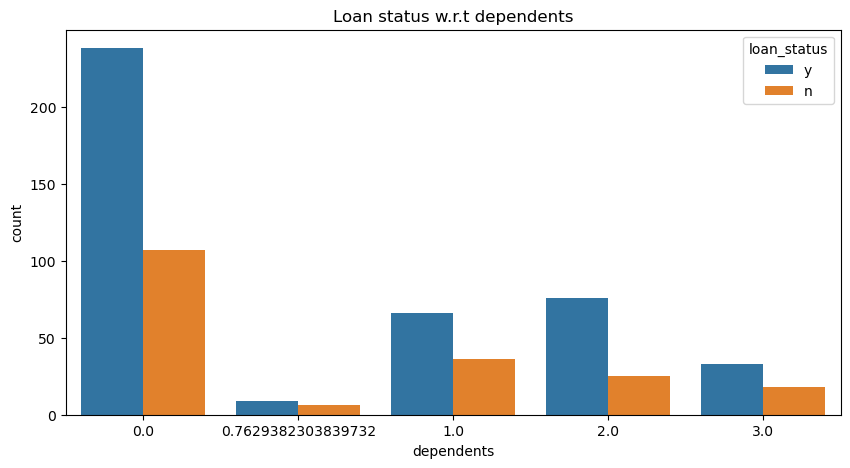

In [20]:
plt.figure(figsize =(10,5))
g = sns.countplot(x = data['dependents'], hue = data['loan_status'])
plt.title("Loan status w.r.t dependents")
plt.show()

### loans of dependents with 0 persons were most.

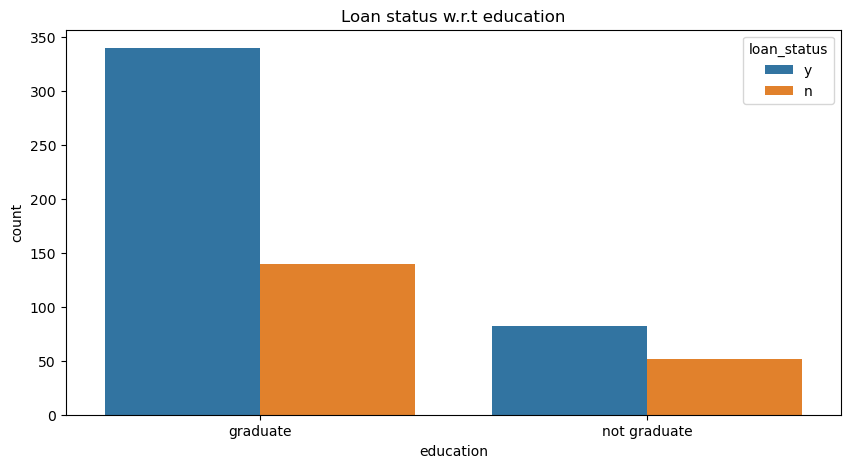

In [21]:
plt.figure(figsize =(10,5))
g = sns.countplot(x = data['education'], hue = data['loan_status'])
plt.title("Loan status w.r.t education")
plt.show()

### Most number of graduate persons got loans.

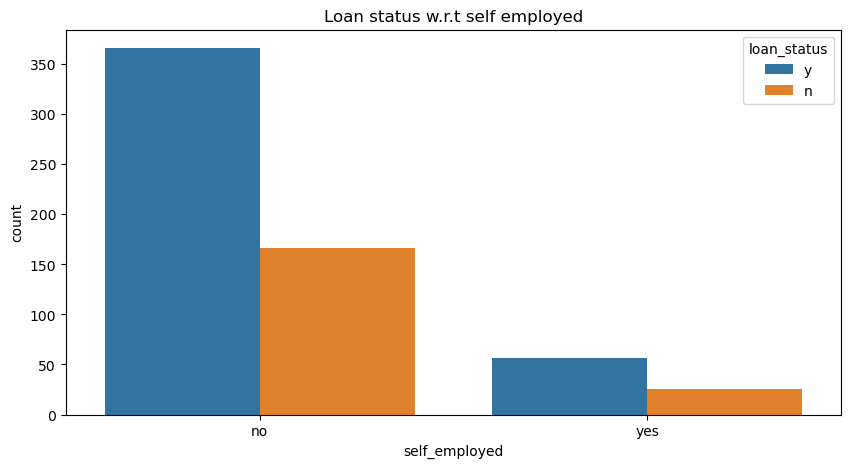

In [22]:
plt.figure(figsize =(10,5))
g = sns.countplot(x = data['self_employed'], hue = data['loan_status'])
plt.title("Loan status w.r.t self employed")
plt.show()

### Most number of self employed persons got loans

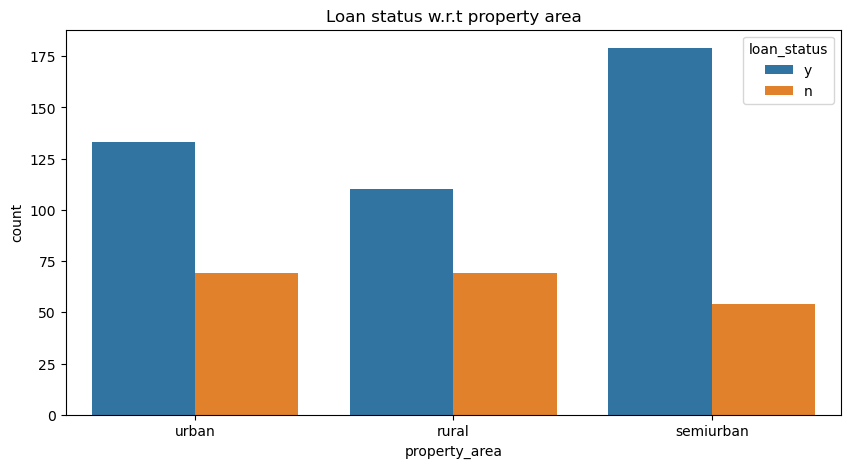

In [23]:
plt.figure(figsize =(10,5))
g = sns.countplot(x = data['property_area'], hue = data['loan_status'])
plt.title("Loan status w.r.t property area")
plt.show()

### Semiurban persons got most number of loans

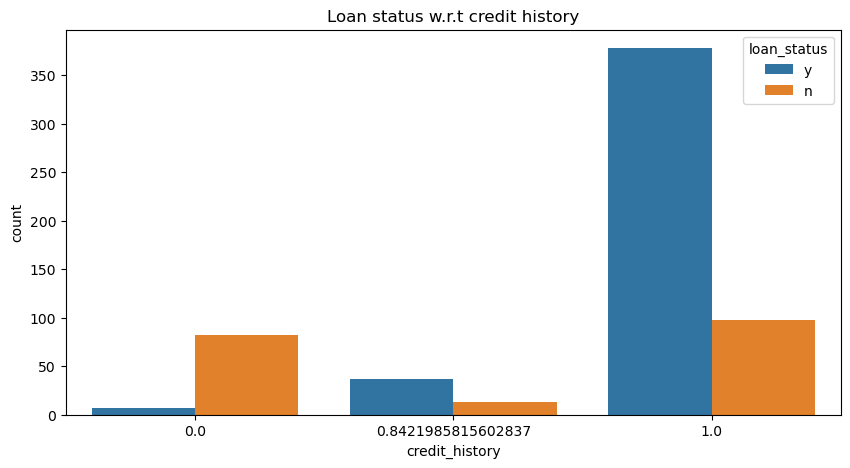

In [24]:
plt.figure(figsize =(10,5))
g = sns.countplot(x = data['credit_history'], hue = data['loan_status'])
plt.title("Loan status w.r.t credit history")
plt.show()

### Persons with high credit history got most number of loans

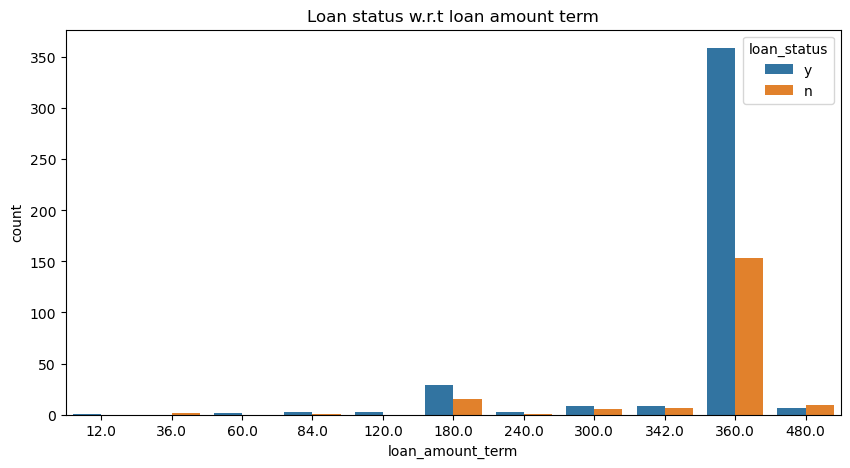

In [25]:
plt.figure(figsize =(10,5))
g = sns.countplot(x = data['loan_amount_term'], hue = data['loan_status'])
plt.title("Loan status w.r.t loan amount term")
plt.show()

### persons with 30 years loan amount term got most number of loans

## Encode Categorical Columns

In [27]:
data['loan_status'] = data['loan_status'].replace({"y": 1, "n" : 0})
data['gender'] = data['gender'].replace({"male": 1, "female" : 0})
data['married'] = data['married'].replace({"yes": 1, "no" : 0})
data['self_employed'] = data['self_employed'].replace({"yes": 1, "no" : 0})

In [28]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['property_area','education', 'dependents']
le = LabelEncoder()
for col in feature_col:
    data[col] = le.fit_transform(data[col])    

In [29]:
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,2,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### We have encoded categorical columns and there are all numerical columns now

Text(0.5, 1.05, 'Pearson correlation of Features')

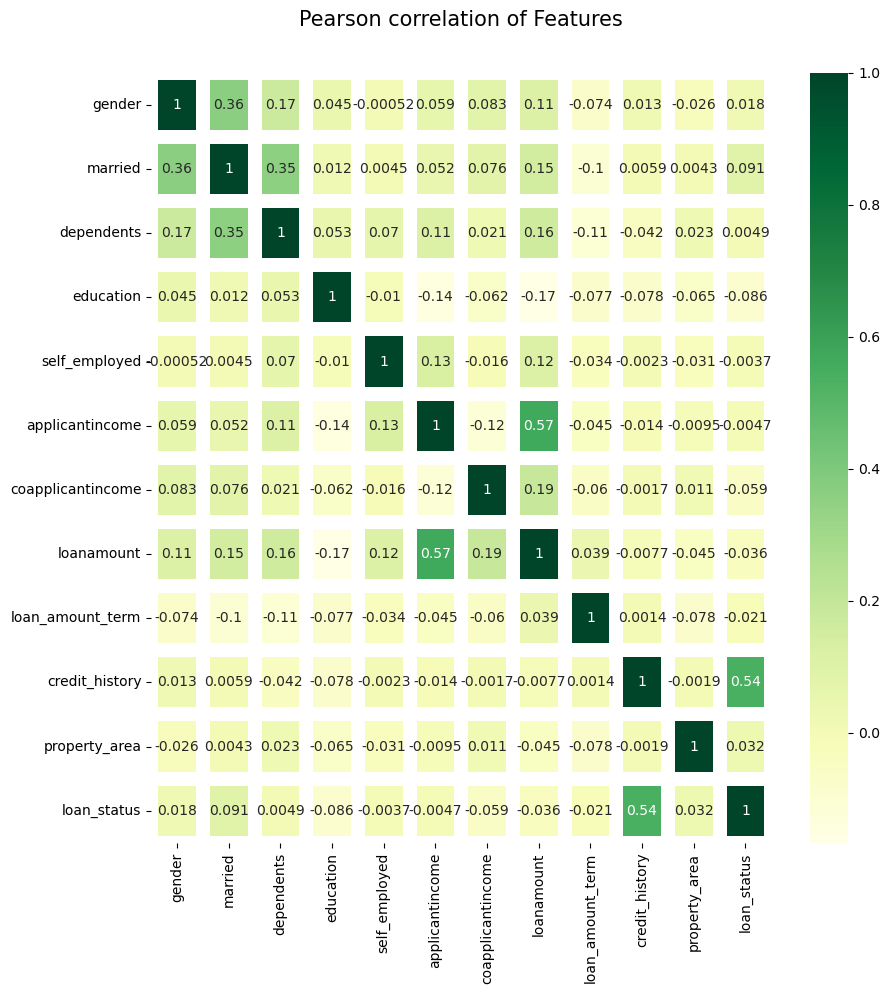

In [30]:
corr = data.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=10,cmap='YlGn')
#sns.heatmap(corr, cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

## Seperating target and independent variables

In [31]:
y=data["loan_status"] # dependent variables
X = data.drop(columns = ['loan_status'],axis=1) # independent variables

## Splitting the data into train and test

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(429, 11) (185, 11) (429,) (185,)


## Logistic Regression model building and saving the model using pickle

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8432432432432433
